In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
from scipy.fftpack import fft, ifft,ifftshift,fftshift
import matplotlib.ticker as ticker
import scipy
from matplotlib.ticker import MaxNLocator


In [2]:
def correlate(x,y):
    xp = ifftshift((x))
    yp = ifftshift((y))
    n, = xp.shape
    xp = np.r_[xp[:n//2], xp[n//2:]]
    yp = np.r_[yp[:n//2],  yp[n//2:]]
    fx = fft(xp)
    fy = fft(yp)
    p = fx*np.conj(fy)
    pi = ifft(p)
    return np.real(pi)[:n//2]/(np.arange(n//2)[::-1]+n//2)


In [3]:
def autocorrelation(x):
    xp = ifftshift((x))
    n, = xp.shape
    xp = np.r_[xp[:n//2], xp[n//2:]]
    f = fft(xp)
    p = np.absolute(f)**2
    pi = ifft(p)
    return np.real(pi)[:n//2]/(np.arange(n//2)[::-1]+n//2)


In [5]:
data = [np.array(list(map(float, line.split()))) for line in open('vcm1.txt')]
time_length = int((len(data)/1001))
chunks = np.zeros((time_length*1001,4))


In [6]:
times = []
velocities = []
for element in data:
    if len(element) == 2:
        times.append(element) 
    if len(element) == 4:
        velocities.append(element)

#converts the list into arrays
times_array = np.array(times)
velocities_array = np.array(velocities)

#reshape the velocities as required
velocities_reshaped = velocities_array.reshape(time_length, 1000, 4)

vel = velocities_reshaped
time = times_array[:,0]


In [9]:
natoms = len(velocities_reshaped[0,:,0])


In [10]:
print(time)
print(times_array[:,0])
print(time.shape)


[200000. 200002. 200004. ... 599996. 599998. 600000.]
[200000. 200002. 200004. ... 599996. 599998. 600000.]
(200001,)


In [11]:
vacf = np.zeros(len(autocorrelation(vel[:,0,0]))) 
dt = time[1]-time[0]


In [12]:
for i in range(len(time)):
    time[i] = i*dt
for i in range(natoms):
    vacf += autocorrelation(vel[:,i,1])
    vacf += autocorrelation(vel[:,i,2])
    vacf += autocorrelation(vel[:,i,3])


vacf = vacf/natoms/3
vacf = np.array([time[:len(vacf)],vacf])
vacf = vacf.T

#np.savetxt("vacf_run5.xvg",vacf,fmt ="%6.6e") 


In [18]:
np.savetxt("vcf_run1.xvg",vacf,fmt ="%6.6e") 


In [13]:
file1 = np.loadtxt("vacf_run1.xvg",comments=["@","#","&"])
file2 = np.loadtxt("vacf_run2.xvg",comments=["@","#","&"])
file3 = np.loadtxt("vacf_run3.xvg",comments=["@","#","&"])
file4 = np.loadtxt("vacf_run4.xvg",comments=["@","#","&"])
file5 = np.loadtxt("vacf_run5.xvg",comments=["@","#","&"]) 


In [23]:
#file_avg = np.loadtxt("vacf_run_avg_imem")
file_avg = np.mean(np.stack((file1[:,:],file2[:,:],file3[:,:],file4[:,:],file5[:,:]), axis = 0), axis=0)
file_avg[:,0] = file_avg[:,0]/1e3
file_avg[:,1] = file_avg[:,1]*1e4
print(file_avg[-10:,:])
print(file_avg.shape)


[[ 1.9998000e+02 -1.8501330e-05]
 [ 1.9998200e+02 -1.8519716e-05]
 [ 1.9998400e+02 -1.8536464e-05]
 [ 1.9998600e+02 -1.8551512e-05]
 [ 1.9998800e+02 -1.8564814e-05]
 [ 1.9999000e+02 -1.8576308e-05]
 [ 1.9999200e+02 -1.8585960e-05]
 [ 1.9999400e+02 -1.8593744e-05]
 [ 1.9999600e+02 -1.8599608e-05]
 [ 1.9999800e+02 -1.8603598e-05]]
(100000, 2)


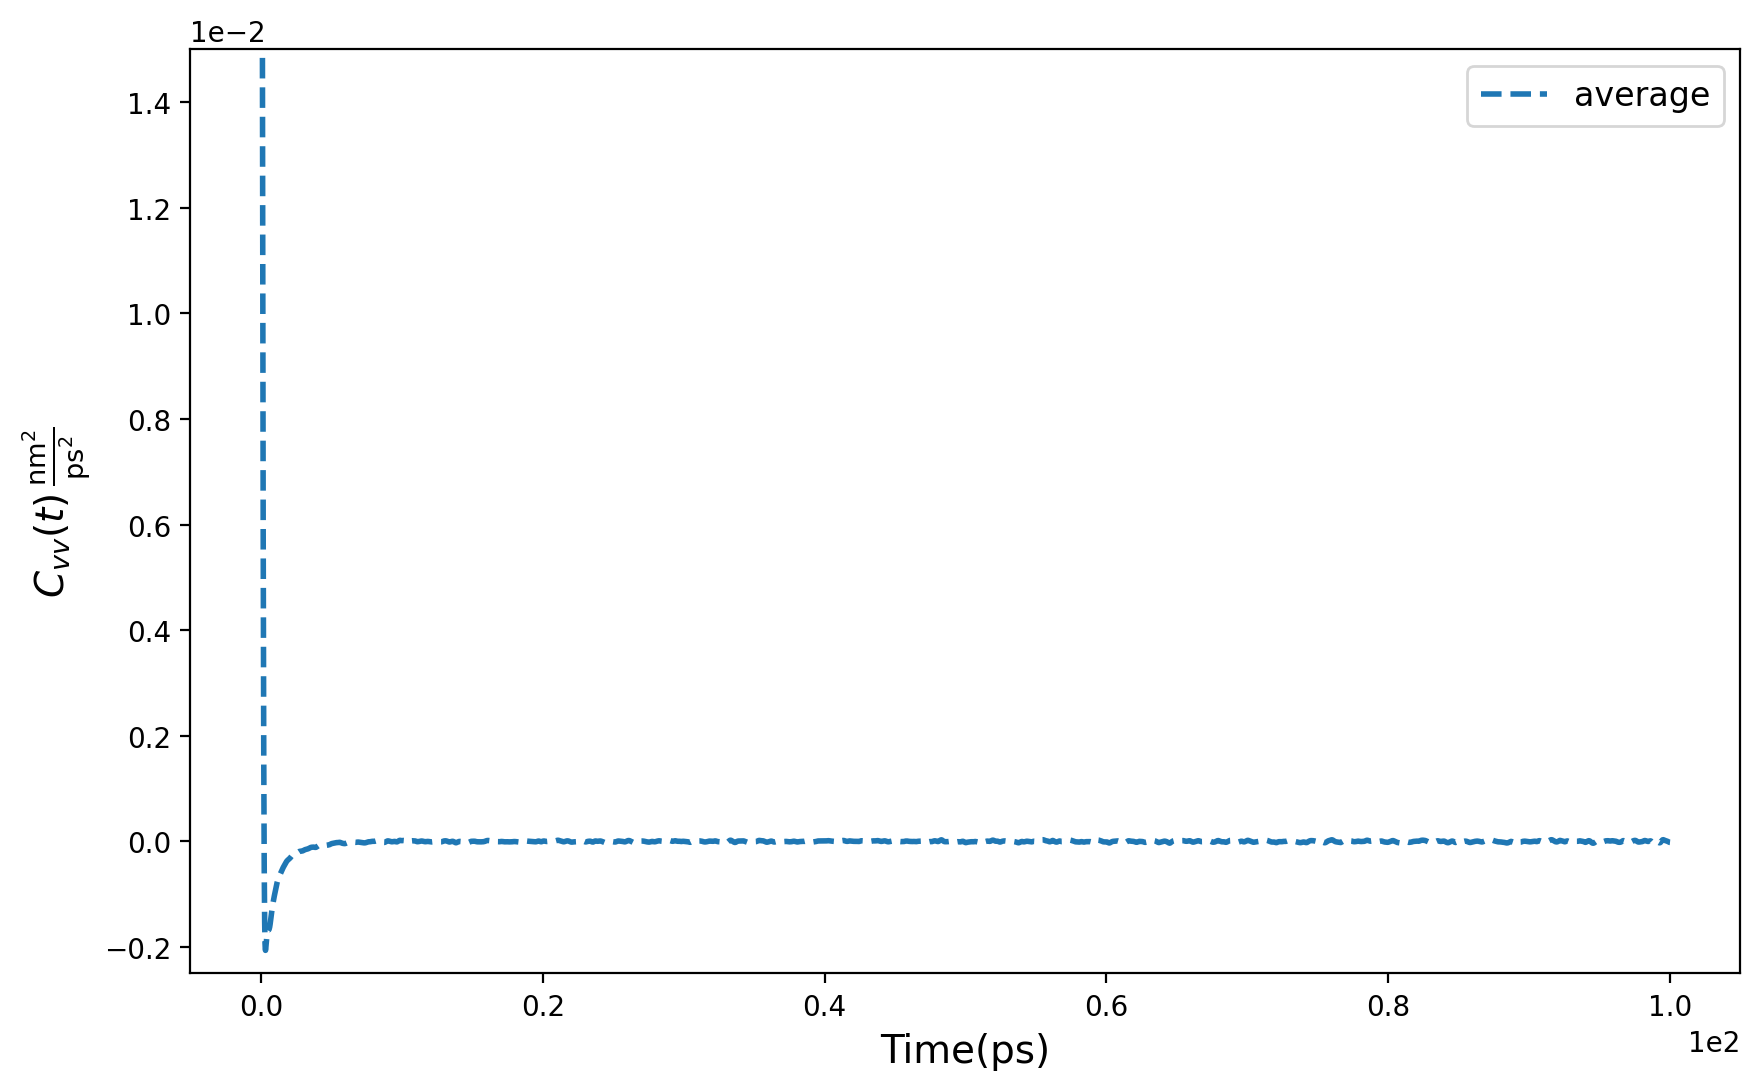

In [48]:
# Create a new figure, adjust the size and resolution
plt.figure(figsize=(10, 6), dpi=200)

# Plot data with labels and formatting
# plt.plot(file2[:50000,0]/(2*1e3), file2[:50000,1]*(1e4), label='file2', linestyle='-', linewidth=2)
plt.plot(file_avg[:,0]/2, file_avg[:,1], label='average', linestyle='--', linewidth=2)

# Set titles and labels
#plt.title("compare", fontsize=18, fontweight='bold')
plt.xlabel("Time(ps)", fontsize=14)
plt.ylabel(r"$C_{vv}(t) \, \frac{\mathrm{nm}^2}{\mathrm{ps}^2}$", fontsize=14)
#plt.ylabel("$C_{vv}(t)//frac{nm^{2}}{ps^{2}}$", fontsize=14)

# Customize ticks on axes
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# Add grid for better readability
#plt.grid(True, linestyle='--', linewidth=0.5)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Optionally add text annotations
#plt.text(2, 0.5, 'sin(x)', fontsize=12, color='blue')
#plt.text(8, -0.5, 'cos(x)', fontsize=12, color='red')

# Add limits to axes (optional)
#plt.xlim(0, 10)
plt.ylim(-25e-4, 15e-3)

# Tight layout to prevent clipping of labels/titles
#plt.tight_layout()

# Save the figure in high resolution (optional)
#plt.savefig('plot.png', dpi=600)

# Show the plot
plt.show()


In [25]:
np.savetxt("vacf_avg_lmp",file_avg,fmt ="%6.6e") 


[ 99.998 100.   ]


In [5]:
plot1 = np.loadtxt("vcf_avg_gmx")
plot2 = np.loadtxt("vacf_avg_lmp")


In [7]:
print(plot1)


[[ 0.0000e+00  8.8688e-02]
 [ 1.0000e-03  8.8678e-02]
 [ 2.0000e-03  8.8658e-02]
 ...
 [ 9.9998e+01 -1.8000e-05]
 [ 9.9999e+01 -1.8000e-05]
 [ 1.0000e+02 -1.8000e-05]]


In [8]:
plot1_intg = scipy.integrate.cumtrapz(plot1[:,1], plot1[:,0], initial=0)
plot2_intg = scipy.integrate.cumtrapz(plot2[:,1], plot2[:,0], initial=0)


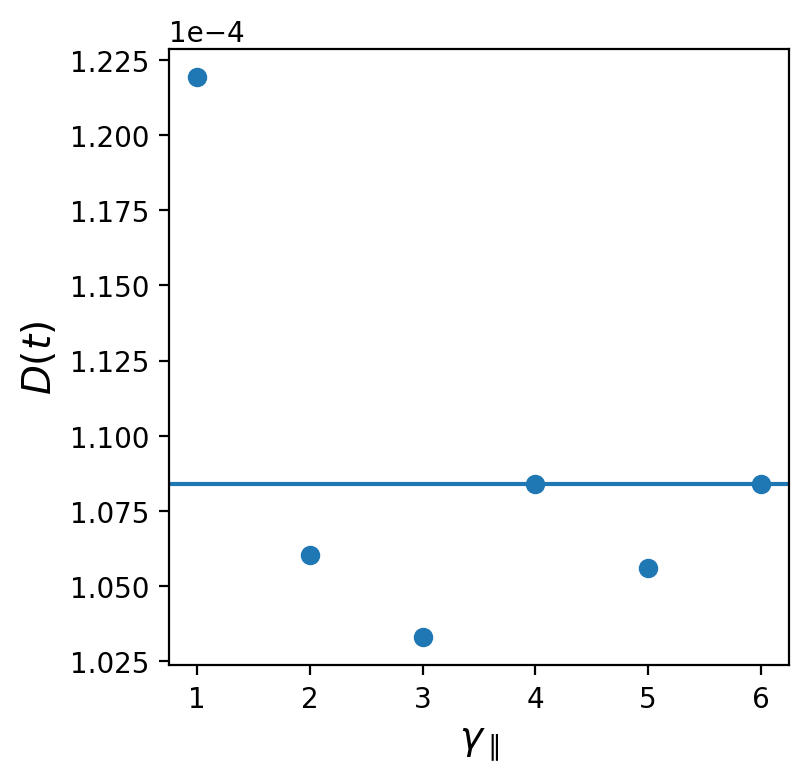

In [58]:
# Create a new figure, adjust the size and resolution
plt.figure(figsize=(4, 4), dpi=200)

# Plot data with labels and formatting
# plt.plot(file2[:50000,0]/(2*1e3), file2[:50000,1]*(1e4), label='file2', linestyle='-', linewidth=2)
plt.scatter(np.arange(1,len(y[1:])+1),y[1:] ,marker="o")
plt.axhline(y=1.0838*1e-4, )
# Set titles and labels
#plt.title("compare", fontsize=18, fontweight='bold')
plt.xlabel("$\gamma_{\parallel}$", fontsize=14)
plt.ylabel(r"$D(t)$", fontsize=14)
#plt.ylabel("$C_{vv}(t)//frac{nm^{2}}{ps^{2}}$", fontsize=14)

# Customize ticks on axes
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# Add grid for better readability
#plt.grid(True, linestyle='--', linewidth=0.5)

# Add a legend
#plt.legend(loc='upper right', fontsize=12)

# Optionally add text annotations
#plt.text(2, 0.5, 'sin(x)', fontsize=12, color='blue')
#plt.text(8, -0.5, 'cos(x)', fontsize=12, color='red')

# Add limits to axes (optional)
#plt.xlim(80, 125)
#plt.ylim(-7e-3, 5e-3)

# Tight layout to prevent clipping of labels/titles
#plt.tight_layout()

# Save the figure in high resolution (optional)
#plt.savefig('plot.png', dpi=600)

# Show the plot
plt.show()


In [55]:
g_tgt = 0.02769
g_itr = np.array([0.02419,0.02781,0.02868,0.02743,0.02809,0.02733,0.02766,0.02813])
itr = np.arange(1,len(g_itr)+1)

pcent = (g_tgt - g_itr)*1e2/g_tgt


In [7]:
pcent


array([12.63994222, -0.43336945, -3.57529794,  0.93896714, -1.44456482,
        1.30010834,  0.10834236, -1.58902131])

In [47]:
it1 = np.loadtxt("vacf_avg_it1")
#it3 = np.loadtxt("vacf_avg_it3")
#it6 = np.loadtxt("vacf_avg_it6")
it8 = np.loadtxt("vacf_avg_it8")
tgt = np.loadtxt("vacf_lmp_avg")
nh = np.loadtxt("vacf_avg_NH")


In [1]:

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 30



# Create a new figure, adjust the size and resolution
plt.figure(figsize=(4.0, 4.0), dpi=600)

ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(MaxNLocator(5))  # Set maximum 5 ticks on x-axis
ax.yaxis.set_major_locator(MaxNLocator(5))  # Set maximum 5 ticks on y-axis
ax.tick_params(which='both', width=2, length=4)
ax.spines["bottom"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)

# Plot data with labels and formatting
# plt.plot(file2[:50000,0]/(2*1e3), file2[:50000,1]*(1e4), label='file2', linestyle='-', linewidth=2)

#plt.plot(it1[:8000,0], it1[:8000,1])
plt.plot(nh[:4000,0]/1e3, nh[:4000,1]*1e6,color="orange",label="CG",linewidth=2.4)
plt.plot(it1[:4000,0]/1e3, it1[:4000,1]*1e6,color="blue",label="It1",linewidth=2.4)
plt.plot(it8[:8000,0]/1e3, it8[:8000,1]*1e6,color="red",label="It8",linewidth=2.4)
plt.plot(tgt[:4000,0]/1e3, tgt[:4000,1]*1e6,color="black",label="AA",linestyle="--",linewidth=2.4)

# Set titles and labels
#plt.title("compare", fontsize=18, fontweight='bold')
plt.xlabel("t/$10^{3}$fs", fontsize=MEDIUM_SIZE)
plt.ylabel(r"VACF$/10^{-6}\AA^{2}fs^{-2}$", fontsize=MEDIUM_SIZE)

# Customize ticks on axes
plt.xticks(fontsize=SMALL_SIZE)
plt.yticks(fontsize=SMALL_SIZE)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Add grid for better readability
#plt.grid(True, linestyle='--', linewidth=0.5)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Optionally add text annotations
#plt.text(2, 0.5, 'sin(x)', fontsize=12, color='blue')
#plt.text(8, -0.5, 'cos(x)', fontsize=12, color='red')

# Add limits to axes (optional)
#plt.xlim(80, 125)
#plt.ylim(-7e-3, 5e-3)

# Tight layout to prevent clipping of labels/titles
#plt.tight_layout()

# Save the figure in high resolution (optional)
#plt.savefig('plot.png', dpi=600)

# Show the plot
plt.show()


NameError: name 'plt' is not defined

In [40]:
d1 = np.loadtxt("D_avg_it1")
d3 = np.loadtxt("D_avg_it3")
d6 = np.loadtxt("D_avg_it6")
d8 = np.loadtxt("D_avg_it8")
dtgt = np.loadtxt("D_avg_lmp")
dnh = np.loadtxt("D_avg_NH")


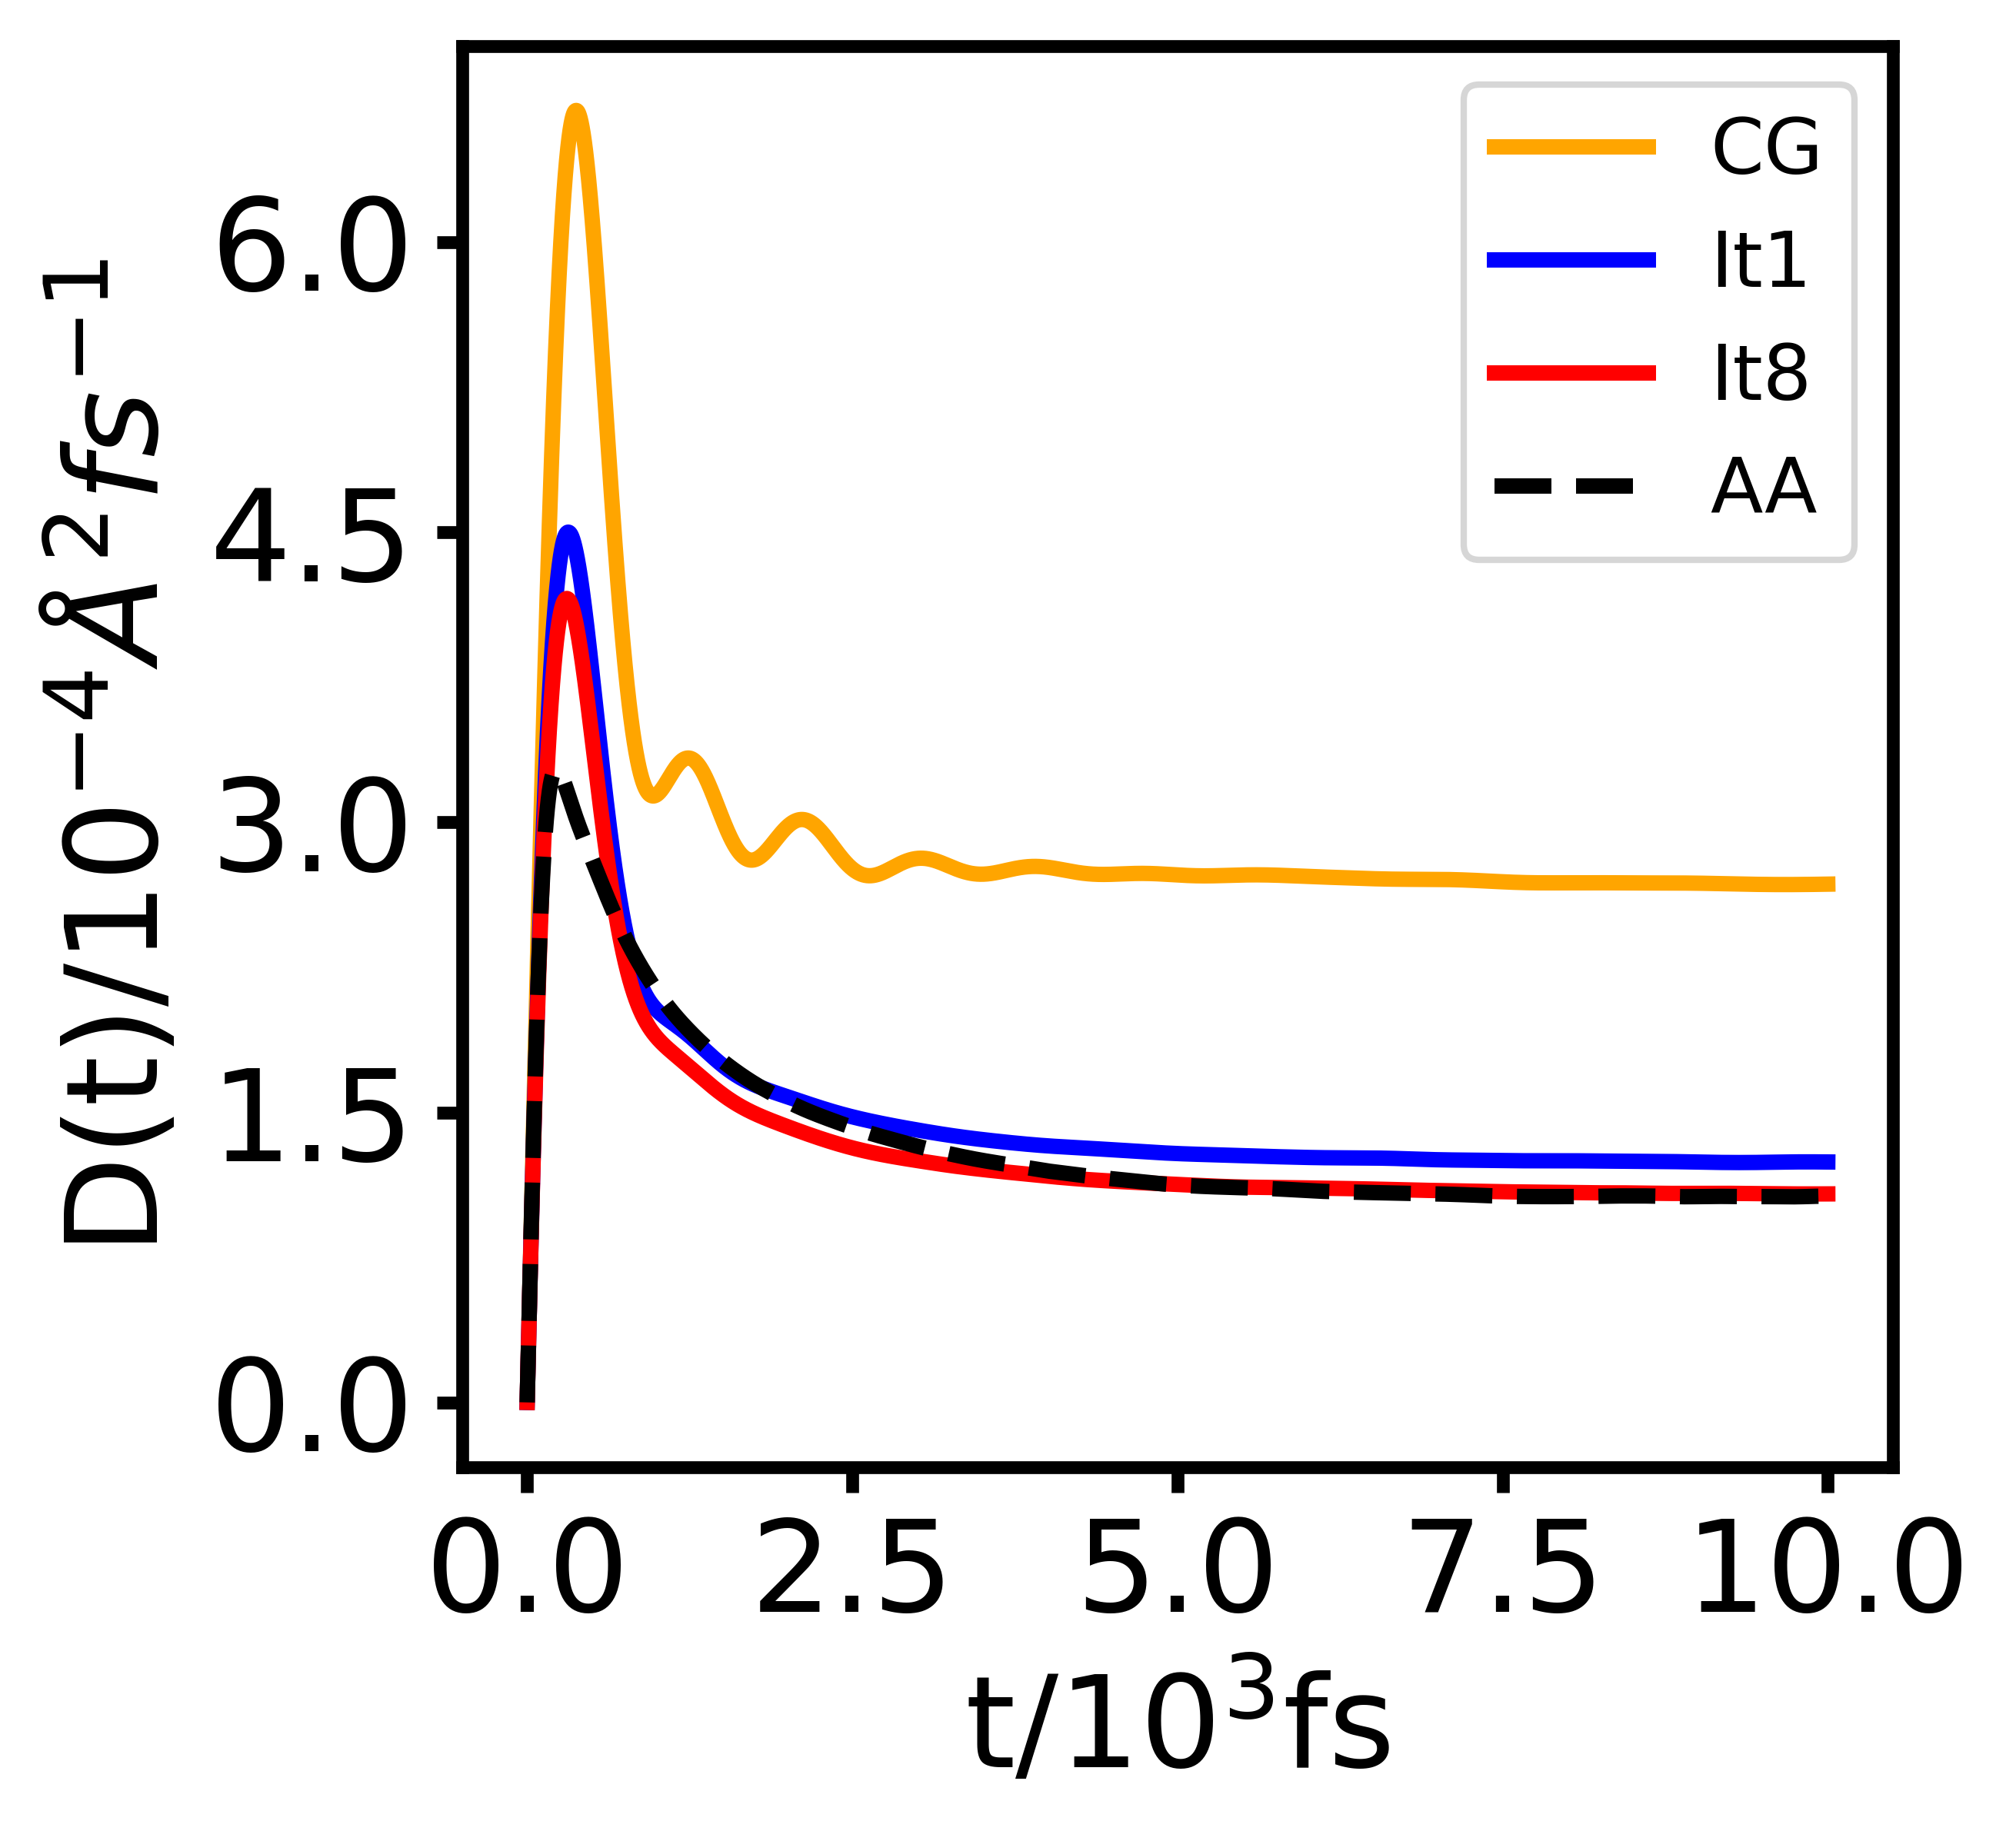

In [46]:

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 30

# Create a new figure, adjust the size and resolution
plt.figure(figsize=(4.0, 4.0), dpi=600)

ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(MaxNLocator(5))  # Set maximum 5 ticks on x-axis
ax.yaxis.set_major_locator(MaxNLocator(5))  # Set maximum 5 ticks on y-axis
ax.tick_params(which='both', width=2, length=4)
ax.spines["bottom"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)

# Plot data with labels and formatting
# plt.plot(file2[:50000,0]/(2*1e3), file2[:50000,1]*(1e4), label='file2', linestyle='-', linewidth=2)

#plt.plot(it1[:8000,0], it1[:8000,1])
plt.plot(dnh[:10000,0]/1e3, dnh[:10000,1]/1e-4,color="orange",label="CG",linewidth=2.4)
plt.plot(d1[:10000,0]/1e3, d1[:10000,1]/1e-4,color="blue",label="It1",linewidth=2.4)
plt.plot(d8[:10000,0]/1e3, d8[:10000,1]/1e-4,color="red",label="It8",linewidth=2.4)
plt.plot(dtgt[:10000,0]/2e3, dtgt[:10000,1]/2e-4,color="black",label="AA",linestyle="--",linewidth=2.4)
# Set titles and labels
#plt.title("compare", fontsize=18, fontweight='bold')
plt.xlabel("t/$10^{3}$fs", fontsize=MEDIUM_SIZE)
plt.ylabel(r"D(t)$/10^{-4}\AA^{2}fs^{-1}$", fontsize=MEDIUM_SIZE)

# Customize ticks on axes
plt.xticks(fontsize=SMALL_SIZE)
plt.yticks(fontsize=SMALL_SIZE)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Add grid for better readability
#plt.grid(True, linestyle='--', linewidth=0.5)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Optionally add text annotations
#plt.text(2, 0.5, 'sin(x)', fontsize=12, color='blue')
#plt.text(8, -0.5, 'cos(x)', fontsize=12, color='red')

# Add limits to axes (optional)
#plt.xlim(80, 125)
#plt.ylim(-7e-3, 5e-3)

# Tight layout to prevent clipping of labels/titles
#plt.tight_layout()

# Save the figure in high resolution (optional)
#plt.savefig('plot.png', dpi=600)
#plt.savefig('figname.png', bbox_inches="tight", dpi=600)
# Show the plot
plt.show()


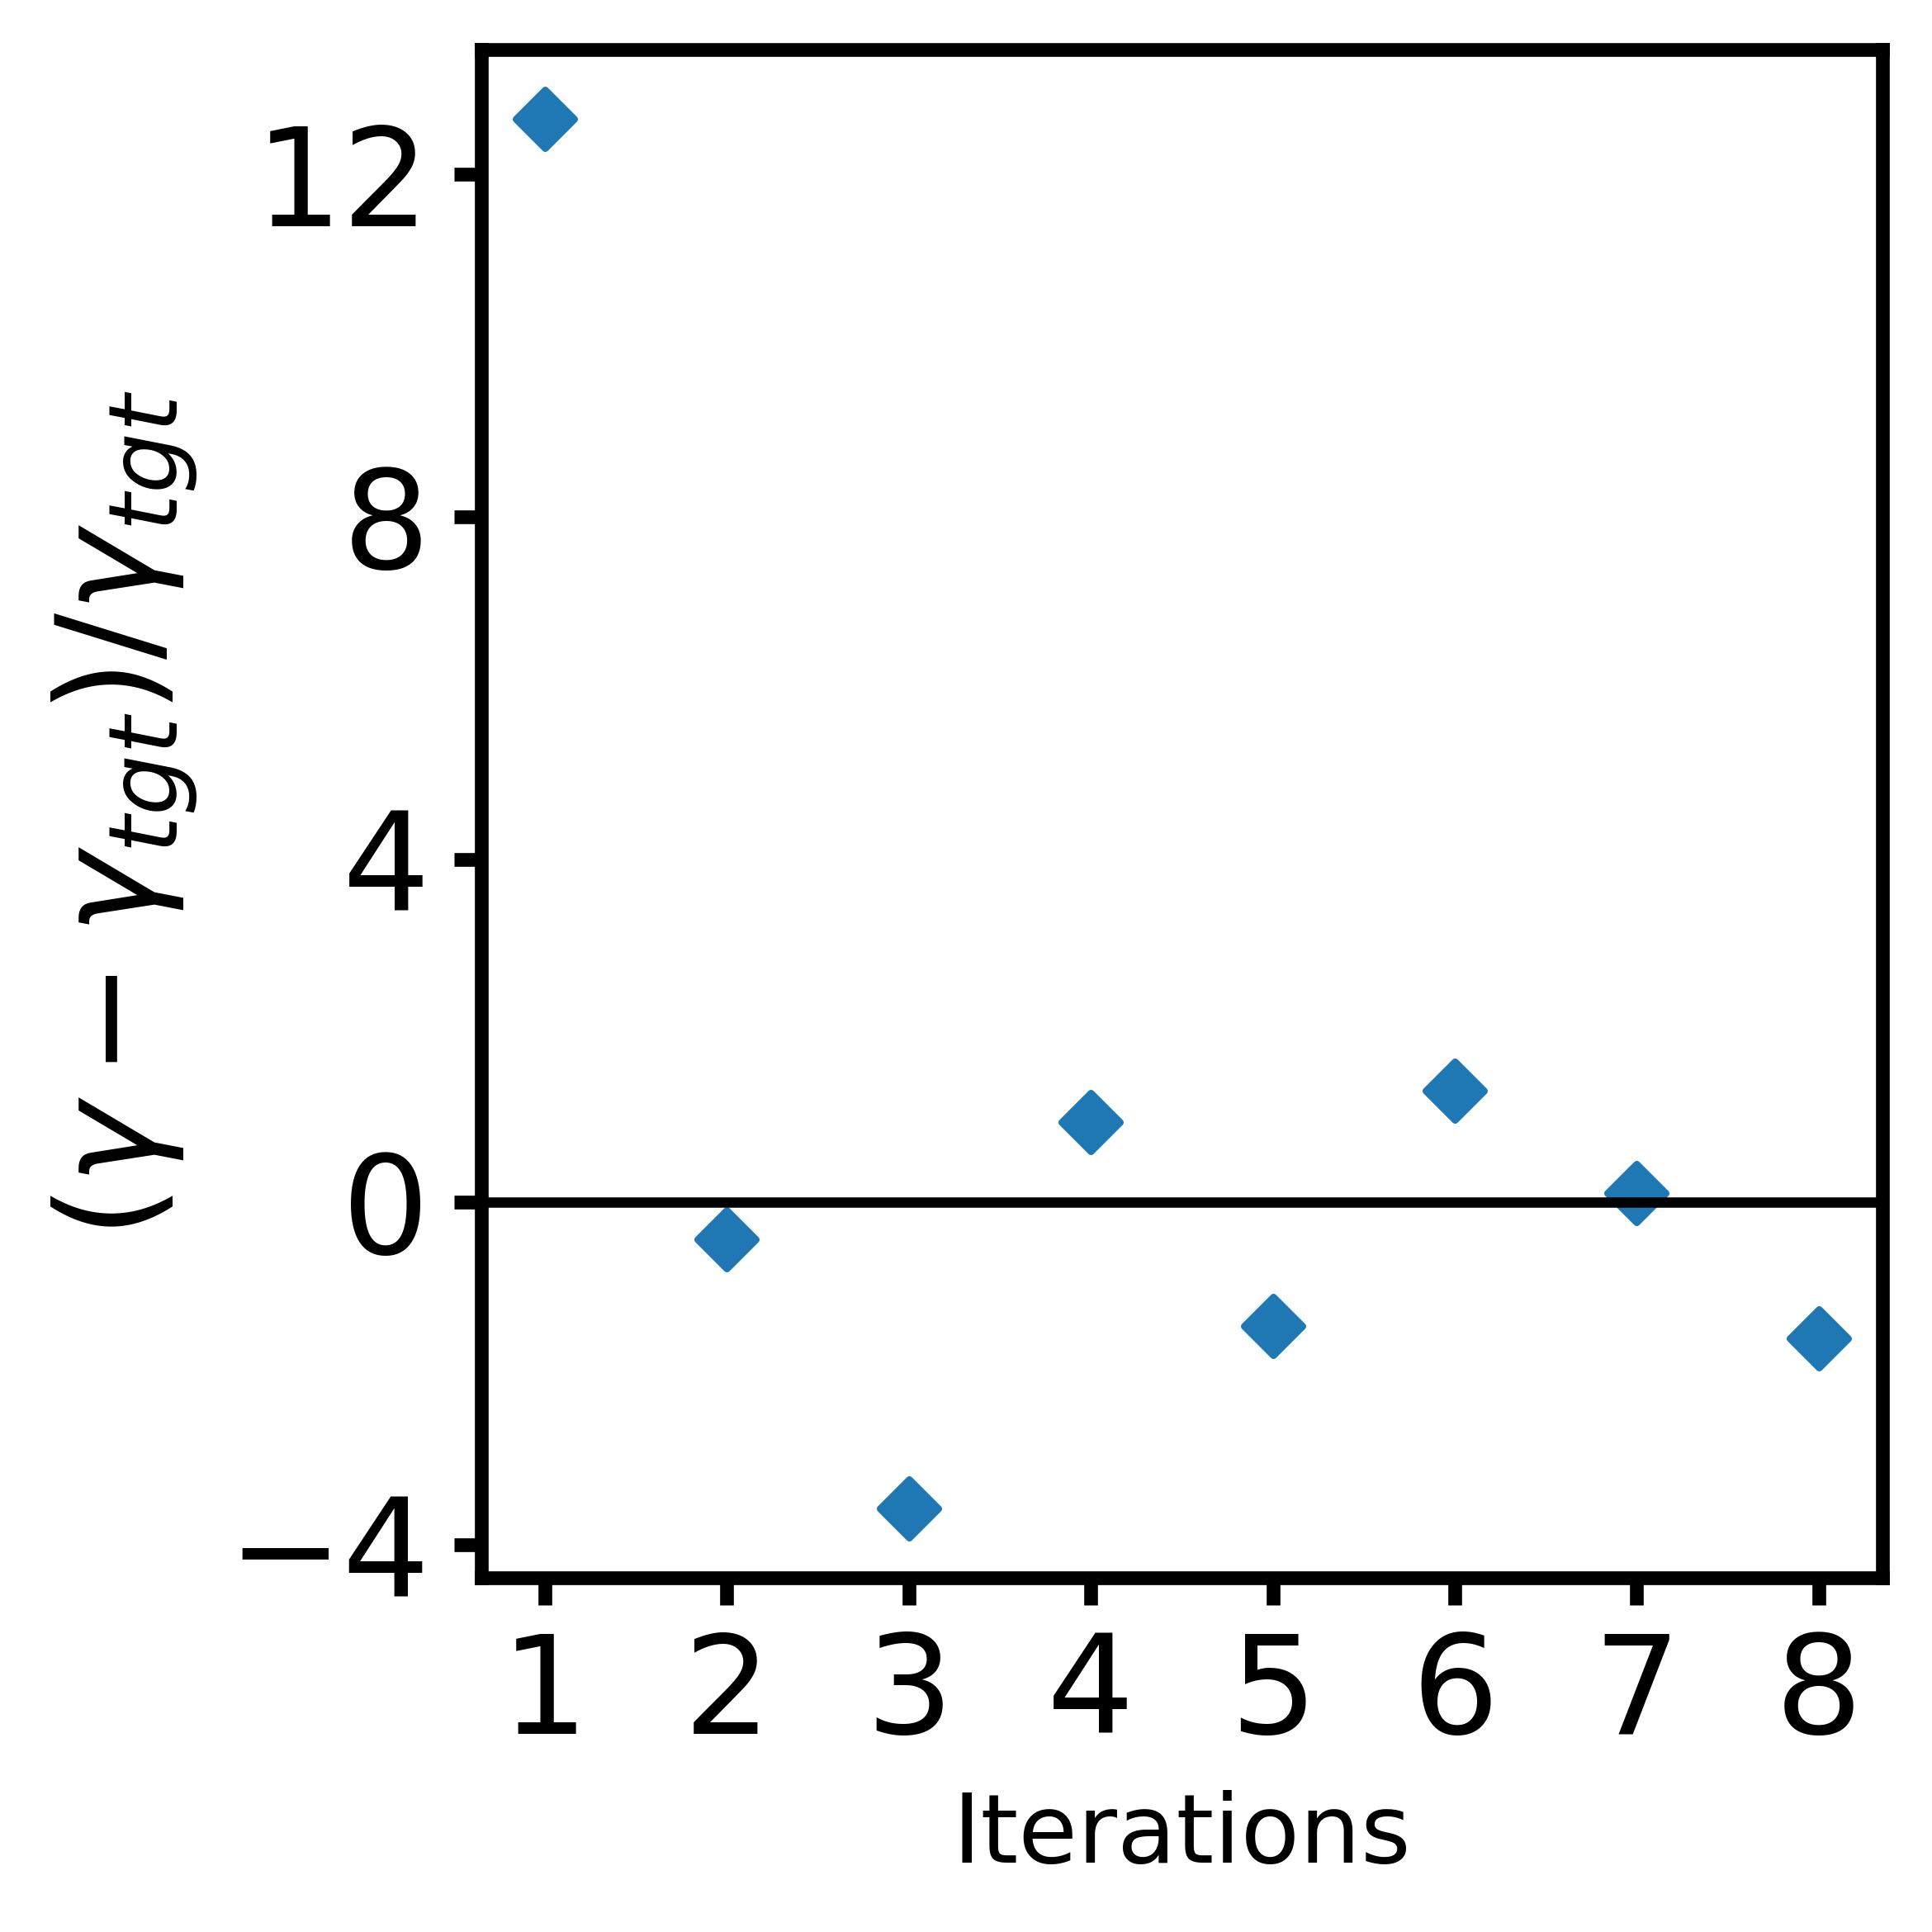

In [58]:
# Create a new figure, adjust the size and resolution
plt.figure(figsize=(4.0, 4.0), dpi=600)

# Plot data with labels and formatting
plt.scatter(itr, pcent, marker="D")
plt.axhline(y=0, c="black")

# Set titles and labels
plt.xlabel("Iterations", fontsize=14)
plt.ylabel(r"$(\gamma - \gamma_{tgt}) / \gamma_{tgt}$", fontsize=MEDIUM_SIZE)

# Customize ticks on axes (limiting the number of ticks)
ax = plt.gca()  # Get current axes
ax.xaxis.set_major_locator(MaxNLocator(8))  # Set maximum 5 ticks on x-axis
ax.yaxis.set_major_locator(MaxNLocator(5))  # Set maximum 5 ticks on y-axis
ax.tick_params(which='both', width=2, length=4)
ax.spines["bottom"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)

# Customize tick sizes
plt.xticks(fontsize=SMALL_SIZE)
plt.yticks(fontsize=SMALL_SIZE)

# Tight layout to prevent clipping of labels/titles
plt.tight_layout()

# Show the plot
plt.show()


In [64]:
tmpx = np.linspace(0,1,100)
tmpy = (1 - tmpx/0.5)**2


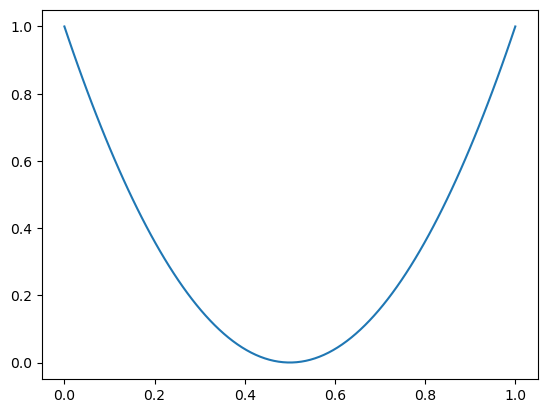

In [65]:
plt.plot(tmpx,tmpy)
plt.show()
